# Create a metapopulation

Here we use the `coalestr.species()` function to construct a toy model of the global parasite metapopulation, based loosely on what is known about the emergence of *Plasmodium falciparum*.  The model has three phases:

* a small founder population with a static population size for 1,000 generations

* an exponential growth phase with $R_0 = 1.0005$ beginning approximately 10,000 years ago

* a plateau of $N_h = 14660$ for 40,000 generations

This gives a contemporary parasite population with a mean coalescence time of ~18,000 generations (assuming a generation time of 3 months) and a nucleotide diversity of approximately $4 \times 10^{-4}$.

Default parameter settings can be modified using these keyword arguments:

* Founder phase
  * founder_duration = 1000
  * founder_N = 10
  * founder_Q = 3
  * founder_X = 0.2
    
* Exponential growth phase
  * R0 = 1.0005
  * expansion_Q = 3
  * expansion_X = 0.2
    
* Plateau phase
  * plateau_duration = 40000
  * plateau_N = 14660
  * plateau_Q = 3
  * plateau_X = 0.2

In [6]:
import coalestr as cs

In [8]:
my_metapopulation = cs.species()

my_metapopulation.get_coalescent()

my_metapopulation.get_diversity()

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0     17588.1   5108.6
Observation time.  Nucleotide diversity     Haplotype homozygosity
                      beho       wiho           beho       wiho
        0           3.87e-04   1.12e-04       4.15e-03   6.89e-01


Above we see that the default model gives a nucleotide diversity of 3.87e-4 in the current parasite population, and within-host nucleotide diversity of 1.12e-4.

Let us look at time series data showing how nucleotide diversity builds up in the global metapopulation over time.

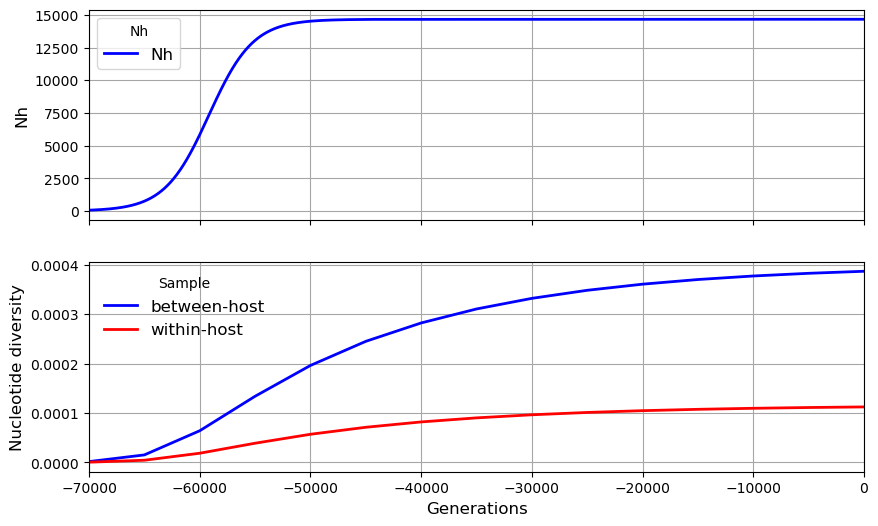

In [9]:
history = my_metapopulation.t_his

observe = [x for x in range(0,history,5000)]

my_metapopulation.get_coalescent(observe, show = False)
my_metapopulation.get_diversity(show = False)
my_metapopulation.plot_observations(metrics = ("Nh", "snp_het",))

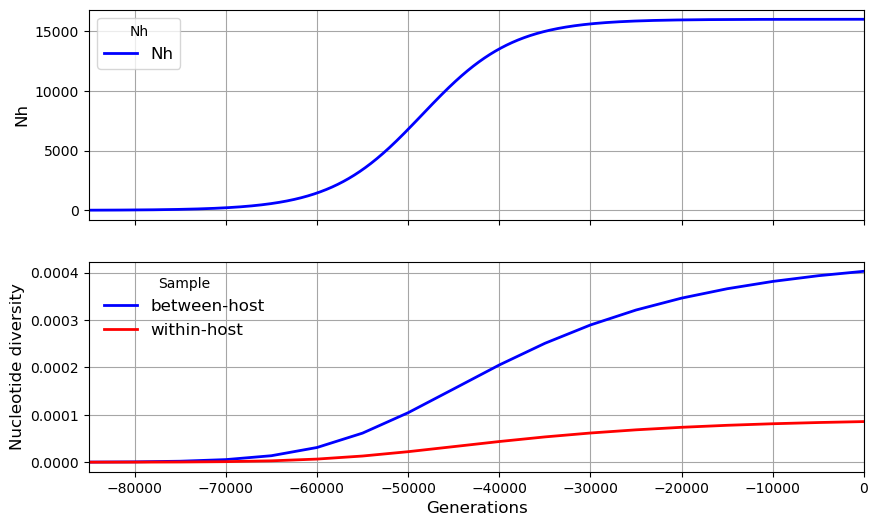

In [14]:
# Here we modify some of the default parameters

my_metapopulation = cs.species(
    founder_duration = 1000, 
    founder_N = 10,
    founder_Q = 3,
    founder_X = 0,
    R0 = 1.0002,
    expansion_Q = 10,
    expansion_X = 0.05,
    plateau_duration = 100,
    plateau_N = 16000,
    plateau_Q = 10,
    plateau_X = 0.05)

history = my_metapopulation.t_his

observe = [x for x in range(0,history,5000)]
my_metapopulation.get_coalescent(observe, show = False)
my_metapopulation.get_diversity(show = False)
my_metapopulation.plot_observations(metrics = ("Nh", "snp_het",))